<a href="https://colab.research.google.com/github/BeautifulTovarisch/statistics-potpourri/blob/main/random_number_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Numbers and Monte Carlo

The subject of this notebook is Random Number generation and Monte Carlo simulation. In Julia, this is accomplished via the `rand` function.

## Random Number Generation

A Random Number Generator (RNG) is a _deterministic_ function that gives the appearance of a random sequence $x_n+1 = f(x_n, x_{n-1}, \dots, x_0)$ must satisfy several properties:

1. Any two elements, $x_i, x_j, \; i \neq j$ should be ***statistically independent***, meaning the value of one cannot be used to determine the value of the other.

2. The ***distribution*** of $\{x_n\}$ should appear ***uniform***.

3. The range of $\{x_n\}$ should be ***well defined***.

4. The sequence should repeat itself as infrequently as possible

For example, take $f$ to be a sequence that produces a pseudorandom sequence whose range is given by $x_n = \{0, 1, 2, \dots, 2^l - 1\}$ where $l$ is a power of 2 typically corresponding to the width of a register for a given architecture.

To normalize this sequence to a range of $[0,1]$, we divide each term by $2^l - 1$:

\begin{equation}
  U_n = \frac{x_n}{2^l - 1}
\end{equation}

We call the start of this sequence a ***seed***, usually a unix timestamp of the current time.

In [17]:
import Pkg

Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("Measures")
Pkg.add("LaTeXStrings")
Pkg.add("LinearAlgebra")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [442fdcdd] + Measures v0.3.2
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [b964fa9f] + LaTeXStrings v1.4.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


## Basic Example

This example shows the simplest use of `rand()` with two different seeds. Hardcoding a seed in this manner makes the sequence deterministic.

In [ ]:
using Random

# Seed the number generator
Random.seed!(1974)
println("seed(1974): $(rand()) \t $(rand()) \t $(rand())")

Random.seed!(1975)
println("seed(1975): $(rand()) \t $(rand()) \t $(rand())")

## Estimating Pi

One way of estimating $\pi$ is to notice the area of a quadrant of the unit circle is $\frac{\pi}{4}$. Using a ***Monte Carlo Simulation*** to generate random points, we can measure the proportion of points that lie in the upper quadrant to obtain an approximation for $\frac{\pi}{4}$, which can then be used to estimate $\pi$:

\begin{equation}
  \frac{\hat{\pi}}{4} =
  \frac{x^2 + y^2 \leqslant 1}{\text{total points}}
\end{equation}

In [ ]:
"""
Estimating Pi using a Monte Carlo Simulation

The following example computes N=10^5 points that lie within a unit circle. Pi
can be estimated by taking the proportion of one quadrant's points to the total.
"""

using Random, LinearAlgebra, Plots; pyplot()
Random.seed!()

N = 10^5

# Simulate
points = [[rand(), rand()] for _ in 1:N]

upperLeft = filter((p) -> norm(p) <= 1, points)
otherQuads = filter((p) -> norm(p) > 1, points)

println("Pi is approximately: $(4*length(upperLeft)/N)")

scatter(first.(upperLeft), last.(upperLeft), c=:blue, ms=1, msw=0)
scatter(first.(otherQuads), last.(otherQuads), c=:red, ms=1, msw=0,
  xlims=(0,1), ylims=(0,1), legend=:none, ratio=:equal)

## Building a Random Number Generator

This section describes a _Linear Congruential Generator_, which is an ***affine*** transformation modulo some integer $m$:

\begin{equation}
  x_{n+1} = (ax_n + c) \mod m
\end{equation}

Number theory has determine reasonable values for $c, n$, and $m$ which give good performance.

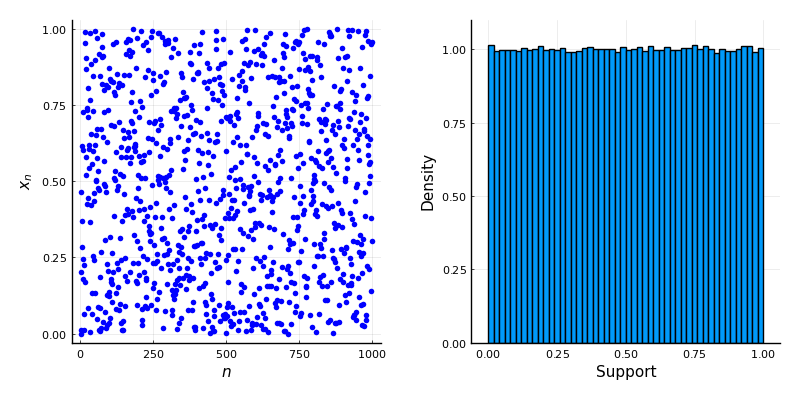

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [19]:
"""
Linear Congruential Generator

This cell implements a basic LCG for generating random numbers.
"""

using Plots, LaTeXStrings, Measures; pyplot()

a, c, m = 69069, 1, 2^32

# Compute the next element in the sequence
next(z) = (a*z + c) % m

# Allocate an array of Float64
N=10^6
data = Array{Float64, 1}(undef, N)

# Populate `data` by repeatedly normalizing and compute the next element
# x represents the seed
x = 808
for i in 1:N
  data[i] = x / m
  global x = next(x)
end

p1 = scatter(1:1000, data[1:1000],
  c=:blue, m=4, msw=0, xlabel=L"n", ylabel=L"x_n")

p2 = histogram(data, bins=50, normed=:true,
  ylims=(0,1.1), xlabel="Support", ylabel="Density")

plot(p1, p2, size=(800, 400), legend=:none, margin = 5mm)